<a href="https://colab.research.google.com/github/amukh946/CS-Principles/blob/master/Day6_ClassificationMethods_(1)_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='SEAGREEN'>Day 6</font>
## <font color='SEAGREEN'>Classification Methods</font>

You have learned about the KNN and Naive Bayes classifiers in your lectuers. You implemented KNN yesterday, applied it on your datset, and claculated the accuracy. Today we dive deeper into Random Forest and Decision Tree using their implementation in scikit-learn. Then we use a few other classification methods and compare their performance.

### Load the Data
Follow the same steps as yesterday and read the data, trasform to the proper form, vectorize each tweet, and generate LDA topics for each tweet. Generate X_train, X_test, y_train, and y_test to practice with different classifiers.

In [0]:
# Your code
#import pandas as pd
helptweets = []
nohelptweets = []

for line in open("help.txt", 'r', encoding='utf-8'):
    helptweets.append(line)
for line in open("nothelp.txt", 'r', encoding='utf-8'):
    nohelptweets.append(line)
all_text = helptweets + nohelptweets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
#         print(model.components_)
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


n_features = 1000
n_components = 10
n_top_words = 20

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(all_text)
print()

    
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
# print(lda.components_)
print_top_words(lda, tf_feature_names, n_top_words)
tf = tf_vectorizer.fit(all_text)
help_features = []
for i in helptweets:
    x = tf.transform([i])
    x = lda.transform(x)
    help_features.append(list(x[0]))
    
nohelp_features = []
for i in nohelptweets:
    x = tf.transform([i])
    x = lda.transform(x)
    nohelp_features.append(list(x[0]))
help_features
X = []
y = []
for tweet in help_features:
    X.append(tweet)
    y.append(1)
for tweet in nohelp_features:
    X.append(tweet)
    y.append(0)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Break the dataset up into the examples (X) and their labels (y)
X, y = X, y

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train
import math
import operator
import statistics
from statistics import mode

def euclideanDistance(instance1, instance2):
    d = 0
    for i in range(len(instance1)):
        d += (instance1[i]-instance2[i])**2
    return math.sqrt(d)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    for i in range(len(trainingSet)):
        d = euclideanDistance(trainingSet[i], testInstance)
        dist = (i, d)
        distances.append(dist)
    distances.sort(key=operator.itemgetter(1))
    return distances[:k]

def predictLabel(neighbors, y_train):
    labels = []
    gcl = 0
    for i in range(len(neighbors)):
        labels.append(y_train[neighbors[i][0]])
    try: 
        gcl = mode(labels)
    except: 
        return predictLabel(neighbors[:-1], y_train)
    return gcl
        
def getAccuracy(y_test, y_pred):
    cl = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            cl +=1
    return(cl/len(y_pred))*100

yy=[]

for i in range(len(X_test)):
    yy.append(predictLabel((getNeighbors(X_train, X_test[i], 5)), y_train))
    
print(getAccuracy(y_test, yy))
print(yy)



Topics in LDA model:
Topic #0: like fema sandy ve dont looks devastated resources hit past areas seen flood assistance govchristie workers takes jgf zone shirts
Topic #1: sandy hurricanesandy people hurricane hope statenisland tomorrow http today know house really don safe left bad good gonna water help
Topic #2: sandy hurricane http hurricanesandy nyc statenisland relief day help post helpstatenisland just storm donate lol did marathon aftermath victims thanks
Topic #3: sandy victims help ny http need home statenisland thank nj helping si beach helpsi 11 power hurricanesandy red needs cross
Topic #4: sandy http staten island hurricane new relief help helpsi recovery efforts jersey york donate rt victims dorp hit obama volunteer
Topic #5: homes destroyed high coast east manhattan solutions siraj https leave coverage wake businesses hurricane late sister feels winter states important
Topic #6: sandy hurricanesandy power just days lost watch family time got thanks happy finally getting

### KNN Classifier
Copy your code from the last notebook to fit a KNN classifier to your data. Then save Accuracy, Precision, Recall, and F1 score in acc_knn, p_knn, r_knn, and f1_knn.

In [0]:
# Your code
# Set k=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_predi=[]

for i in range(len(X_test)):
    y_predi.append(neigh.predict([X_test[i]]))
    
acc_knn = accuracy_score(y_test, y_predi)   
p_knn = precision_score(y_test, y_predi, labels=None, pos_label=1, average='binary')
r_knn = recall_score(y_test, y_predi, labels=None, pos_label=1, average='binary', sample_weight=None)
f1_knn = f1_score(y_test, y_predi, labels=None, pos_label=1, average='binary', sample_weight=None)

print(acc_knn,p_knn, r_knn, f1_knn)

0.9396751740139211 0.5454545454545454 0.11320754716981132 0.1875


### Naive Bayes Classifier
Read about Naive Bayes (NB) [here](https://scikit-learn.org/stable/modules/naive_bayes.html). Then, write a piece of code to fit a Gaussian NB classifier to your help/nothelp data and print Accuracy, Precision, Recall, and F1 score. Save the scores in acc_gnb, p_gnb, r_gnb, and f1_gnb.

In [0]:
# Your code here
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predicted = gnb.fit(X_train, y_train).predict(X_test) 
acc_gnb= accuracy_score(y_test, y_predicted)   
p_gnb = precision_score(y_test, y_predicted, labels=None, pos_label=1, average='binary')
r_gnb = recall_score(y_test, y_predicted, labels=None, pos_label=1, average='binary', sample_weight=None)
f1_gnb = f1_score(y_test, y_predicted, labels=None, pos_label=1, average='binary', sample_weight=None)

print(p_gnb)


0.05952380952380952


### Decision Tree
Read about Decision Trees (DT) [here](https://scikit-learn.org/stable/modules/tree.html). Then, write a piece of code to fit a DT classifier to your help/nothelp data and print Accuracy, Precision, Recall, and F1 score. Save the scores in acc_dt, p_dt, r_dt, and f1_dt.

In [0]:
# Your code
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

acc_dt = accuracy_score(y_test, y_dt)   
p_dt = precision_score(y_test, y_dt, labels=None, pos_label=1, average='binary')
r_dt = recall_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None)
f1_dt = f1_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None)

print(p_dt)

0.19718309859154928


#### Parameter Tuning
Change maximum depth in your decision tree and observe its effect on the metrics. Try at least 10 different values and generate a plot showing the value of each metric corresponding to each depth.

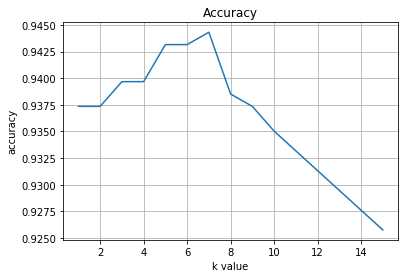

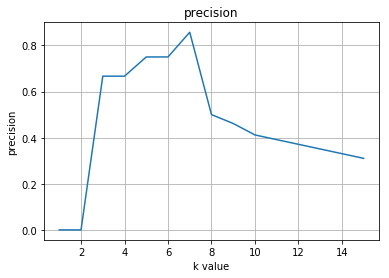

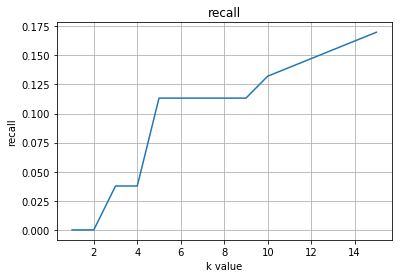

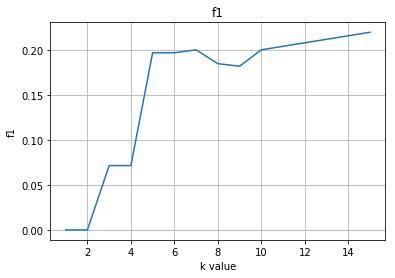

In [0]:
# Your code
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
accldt = []
pldt = []
rldt = []
f1ldt = []
for x in depth: 
    clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = x)
    clf = clf.fit(X_train, y_train)
    y_dt = clf.predict(X_test)

    accldt.append(accuracy_score(y_test, y_dt))    
    pldt.append(precision_score(y_test, y_dt, labels=None, pos_label=1, average='binary'))
    rldt.append(recall_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None))
    f1ldt.append(f1_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None))

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = depth
s = accldt

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='accuracy',
       title='Accuracy')
ax.grid()

fig.savefig("test.png")
plt.show()

#precision
t = depth
s = pldt

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='precision',
       title='precision')
ax.grid()

fig.savefig("test.png")
plt.show()

#recall
t = depth
s = rldt

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='recall',
       title='recall')
ax.grid()

fig.savefig("test.png")
plt.show()

#f1

t = depth
s = f1ldt

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='f1',
       title='f1')
ax.grid()

fig.savefig("test.png")
plt.show()


What do you choose as your maximum depth? 
Train your Decision Tree classifier using that depth and save the metircs in acc_dt, p_dt, r_dt, and f1_dt.

In [0]:
# Your code - 7
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 7)
clf = clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

acc_dt = accuracy_score(y_test, y_dt)   
p_dt = precision_score(y_test, y_dt, labels=None, pos_label=1, average='binary')
r_dt = recall_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None)
f1_dt = f1_score(y_test, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None)

print(acc_dt,p_dt, r_dt, f1_dt)
#0.9443155452436195 0.8571428571428571 0.11320754716981132 0.2

0.9443155452436195 0.8571428571428571 0.11320754716981132 0.2


### Random Forest Classifer
Random Forest classifier is an ensemble of Decision Trees. The idea is that each Decision Tree will be a weak learner capturing part of the features in each class and the Random Forest will be a strong classifier when it combines all the weak learners. Read about Random Forests [here]() and report the metrics on your data.

In [0]:
# your code
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#random_state=0
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clfe = RandomForestClassifier(n_estimators=100, random_state=0)
clfe = clfe.fit(X_train, y_train)
y_rfce = clfe.predict(X_test)

acc_rfc = accuracy_score(y_test, y_rfce)   
p_rfc = precision_score(y_test, y_rfce)
r_rfc = recall_score(y_test, y_rfce)
f1_rfc = f1_score(y_test, y_rfce)

print(acc_rfc,p_rfc, r_rfc, f1_rfc)
# 0.9443155452436195 0.8571428571428571 0.11320754716981132 0.2

0.9408352668213457 0.5833333333333334 0.1320754716981132 0.21538461538461542


#### Paramter Tuning
Change number of Decision Trees in your Random Forest Classifier and observe its effect on the metrics. Try at least 10 different values and generate a plot showing the value of each metric corresponding to number [soure](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

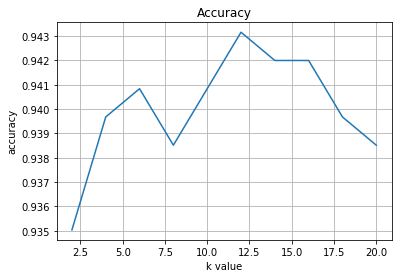

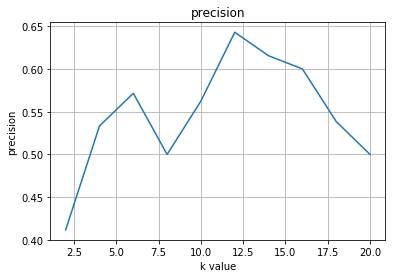

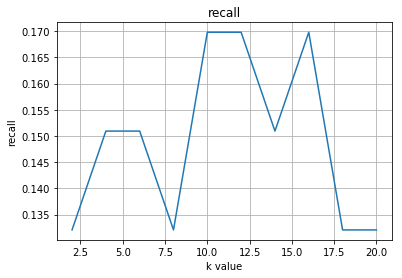

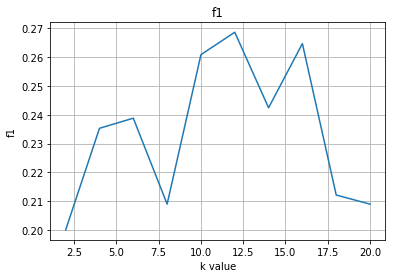

In [0]:
estimators = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
acclrfc = []
plrfc = []
rlrfc = []
f1lrfc = []
for x in estimators: 
    clf = RandomForestClassifier(n_estimators=x, random_state=0)
    clf = clf.fit(X_train, y_train)
    y_rfc = clf.predict(X_test)

    acclrfc.append(accuracy_score(y_test, y_rfc))    
    plrfc.append(precision_score(y_test, y_rfc, labels=None, pos_label=1, average='binary'))
    rlrfc.append(recall_score(y_test, y_rfc, labels=None, pos_label=1, average='binary', sample_weight=None))
    f1lrfc.append(f1_score(y_test, y_rfc, labels=None, pos_label=1, average='binary', sample_weight=None))

# Data for plotting
t = estimators
s = acclrfc

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='accuracy',
       title='Accuracy')
ax.grid()

fig.savefig("test.png")
plt.show()

#precision
t = estimators
s = plrfc

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='precision',
       title='precision')
ax.grid()

fig.savefig("test.png")
plt.show()

#recall
t = estimators
s = rlrfc
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='recall',
       title='recall')
ax.grid()

fig.savefig("test.png")
plt.show()

#f1

t = estimators
s = f1lrfc

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='f1',
       title='f1')
ax.grid()

fig.savefig("test.png")
plt.show()


What do you choose as your number of trees? 
Train your Random Forest using that number and save the metircs in acc_rf, p_rf, r_rf, and f1_rf.

In [0]:
# Your code - 20
clf = RandomForestClassifier(n_estimators=12,
                            random_state=0)
clf = clf.fit(X_train, y_train)
y_rfc = clf.predict(X_test)

acc_rf = accuracy_score(y_test, y_rfc)   
p_rf = precision_score(y_test, y_rfc, labels=None, pos_label=1, average='binary')
r_rf = recall_score(y_test, y_rfc, labels=None, pos_label=1, average='binary', sample_weight=None)
f1_rf = f1_score(y_test, y_rfc, labels=None, pos_label=1, average='binary', sample_weight=None)

print(acc_rf,p_rf, r_rf, f1_rf)

0.9431554524361949 0.6428571428571429 0.16981132075471697 0.26865671641791045

























### Support Vector Machines
Read about SVM [here](https://scikit-learn.org/stable/modules/svm.html#svm-classification). SVM is one the stongest and most popular classifiers in the field of Data Science. Write a piece of code that fits an SVM classifier to your data and save the metrics in acc_svm, p_svm, r_svm, f1_svm.

In [0]:
# Your code
# set gamma='auto'
# set class_weight='balanced'

# your code
from sklearn import svm
clfe = svm.SVC(gamma='auto', class_weight = 'balanced')
clfe.fit(X_train, y_train)  
y_rfce = clfe.predict(X_test)

acc_svm = accuracy_score(y_test, y_rfce)   
p_svm = precision_score(y_test, y_rfce)
r_svm = recall_score(y_test, y_rfce)
f1_svm = f1_score(y_test, y_rfce)

print(acc_svm, p_svm, r_svm, f1_svm)

0.5406032482598608 0.07444168734491315 0.5660377358490566 0.13157894736842105


#### Parameter Tuning
Research what a kernel is. Then retrain your SVM classifiers and report the metrics.

In [0]:
# Your code
# Set gamma='auto'
# set class_weight='balanced'

kernel = ['linear', 'rbf', 'poly']
acc_svmk = []
p_svmk = []
r_svmk = []
f1_svmk = []
for x in kernel: 
    clfe = svm.SVC(gamma='auto', class_weight = 'balanced', kernel = x)
    clfe.fit(X_train, y_train)  
    y_svmk = clfe.predict(X_test)
    acc_svmk.append(accuracy_score(y_test, y_svmk))    
    p_svmk.append(precision_score(y_test, y_svmk))
    r_svmk.append(recall_score(y_test, y_svmk))
    f1_svmk.append(f1_score(y_test, y_svmk))

print(f1_svmk)

[0.1285444234404537, 0.13157894736842105, 0.11584699453551914]


Which kernel achieves the highest F1 score? Set your kernel to the best kernel and save the metircs for SVM in acc_svm, p_svm, r_svm, f1_svm.

In [0]:
# Your Code
# Set gamma='auto'
# set class_weight='balanced'
from sklearn import svm
clfe = svm.SVC(gamma='auto', class_weight = 'balanced', kernel = 'rbf')
clfe.fit(X_train, y_train)  
y_rfce = clfe.predict(X_test)

acc_svm = accuracy_score(y_test, y_rfce)   
p_svm = precision_score(y_test, y_rfce)
r_svm = recall_score(y_test, y_rfce)
f1_svm = f1_score(y_test, y_rfce)

print(acc_svm, p_svm, r_svm, f1_svm)

0.5406032482598608 0.07444168734491315 0.5660377358490566 0.13157894736842105


### Choosing the best model
Generate 4 plots, each for comparing the classifiers based on one metirc. The x axis will be the models and the y axis will be the value of the corresponding parameter.

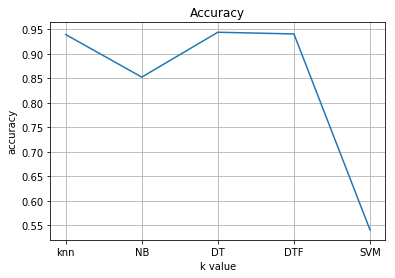

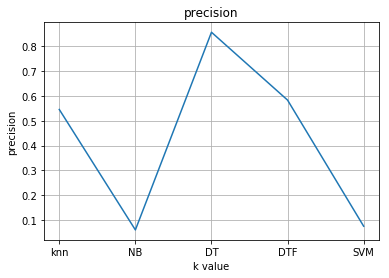

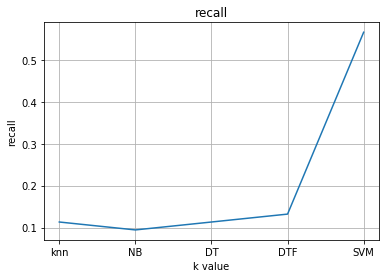

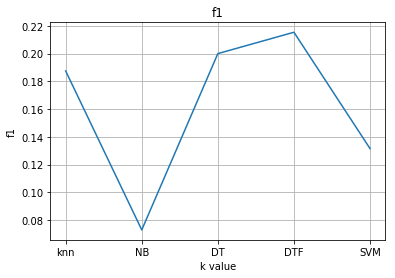

In [0]:
models = ["knn", "NB", "DT", "DTF", "SVM"]
accuracy = [acc_knn, acc_gnb, acc_dt, acc_rfc, acc_svm]
precision = [p_knn, p_gnb, p_dt, p_rfc, p_svm]
recall = [r_knn, r_gnb, r_dt, r_rfc, r_svm]
f1 = [f1_knn, f1_gnb, f1_dt, f1_rfc, f1_svm]

t = models
s = accuracy

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='accuracy',
       title='Accuracy')
ax.grid()

fig.savefig("test.png")
plt.show()

#precision
t = models
s = precision

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='precision',
       title='precision')
ax.grid()

fig.savefig("test.png")
plt.show()

#recall
t = models
s = recall
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='recall',
       title='recall')
ax.grid()

fig.savefig("test.png")
plt.show()

#f1

t = models
s = f1

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='k value', ylabel='f1',
       title='f1')
ax.grid()

fig.savefig("test.png")
plt.show()

Based on the graphs above, which model do you think best fits our data?

In [0]:
# Your answer - Decision Tree

### Advanced Exercise
Write a piece of code that calculates the confusion matrix for a classifier and visualizes it like the figure bellow; the darker color shows higher values. Then, generate the confusion matrix for each of the classifiers your learned about here.
<img src="confusion_matrix.png">